In [39]:
!pip install mdtraj
#!pip install rdkit

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import mdtraj as md
import sys
sys.path.append('/content/drive/MyDrive/AF2RAVE-Glide/kinase_Aloop/')
import os
import kinaseCVs as kcv

In [42]:
import glob
import re
import pickle
import importlib
import kinaseCVs as kcv
importlib.reload(kcv)
from kinaseCVs import resids_Abl1
from kinaseCVs import resids_DDR1
from kinaseCVs import resids_srcK

**Load SPIB coordinates**

In [43]:
round = '/content/drive/MyDrive/AF2RAVE-Glide/SPIB_std_filter/round1'
op_id = [int(x) for x in np.loadtxt(f'{round}/op_id.txt')]

op_max = np.load(f"{round}/DDR1_input/max_unb.npy")
op_min = np.load(f"{round}/DDR1_input/min_unb.npy")
lag = 8000
dt = f"{lag*2e-3} ns"
prefix=f"{round}/dt-{lag}/SPIB/Unweighted_d=2_t={lag}_b=0.0500_learn=0.000100_"
weights=np.load(prefix+"z_mean_encoder_weight0.npy")

wts = weights/(op_max-op_min)
print(op_id)
print(wts)

[1, 2, 3, 7, 8, 10, 11, 12]
[[ 0.09284084  0.04113295 -0.31039463  0.09656175 -0.02102127 -0.10813012
  -0.04166198  0.01493557]
 [ 0.11358153  0.13575025  0.03890331  0.34705924  0.11752161 -0.32470332
   0.20966233 -0.09062353]]


**RMSD filter for AF2-cluster ensemble of Abl1**

In [ ]:
folder = '/content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1'
temp = f'/content/drive/MyDrive/AF2RAVE-Glide/rAF2/Abl1/Abl1_MSA16/pred_1.pdb'
df_rmsd = pd.DataFrame()
cids = []
rmsd_row = []
structure1 = md.load(temp)
id1 = structure1.top.select('name CA')

af2c = glob.glob(f'{folder}/output/*')
for jj in af2c:
    print(f"Processing {jj} ...")
    structure2 = md.load(jj)
    id2 = structure2.top.select('name CA')
    superposed_structure2 = structure2.superpose(structure1, atom_indices=id2, ref_atom_indices=id1)
    # Calculate the RMSD in the unit of nm
    rmsd = md.rmsd(superposed_structure2, structure1, atom_indices=id2, ref_atom_indices=id1)
    rmsd_row.append(rmsd[0])
    cid = re.findall(r'output/(.*)\.pdb', jj)[0]
    cids.append(cid)
df_rmsd['ID'] = cids
df_rmsd['RMSD (nm)'] = rmsd_row

Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/output/EX_U100-000.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/output/EX_305.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/output/EX_286.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/output/EX_034.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/output/EX_075.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/output/EX_057.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/output/EX_177.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/output/EX_192.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/output/EX_330.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/output/EX_119.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/outpu

In [ ]:
slurms = glob.glob(f'{folder}/slurm_log/*')
for slurm in slurms:
    print(f"Processing {slurm} ...")
    with open(slurm, 'r') as file:
        jj = file.read()
        if len(re.findall(r'plddt: (.*)', jj)) != 0:
            cid = re.findall(r'subsampled_MSAs/(.*)\.a3m', jj)[0]
            plddt = float(re.findall(r'plddt: (.*)', jj)[0])
            df_rmsd.loc[df_rmsd['ID']==cid, 'plddt'] = plddt

Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/slurm_log/slurm-4888605.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/slurm_log/slurm-4888715.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/slurm_log/slurm-4888625.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/slurm_log/slurm-4888493.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/slurm_log/slurm-4888589.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/slurm_log/slurm-4888599.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/slurm_log/slurm-4888535.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/slurm_log/slurm-4888775.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/slurm_log/slurm-4888688.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/slurm_log/sl

In [ ]:
df_ranked = df_rmsd.sort_values(by='plddt',ascending=False,ignore_index=True)
df_ranked

,ID,RMSD (nm),plddt
0,EX_U100-009,0.256630,92.919
1,EX_U100-007,0.299898,92.273
2,EX_U100-008,0.282085,92.098
3,EX_U100-004,0.254484,91.620
4,EX_U100-000,0.246923,91.320
...,...,...,...
357,EX_151,1.836921,33.932
358,EX_293,1.692128,33.854
359,EX_339,1.217589,33.467
360,EX_297,1.859800,33.069


In [ ]:
df_ranked.to_csv(f'{folder}/AF2rank.csv',index=False)

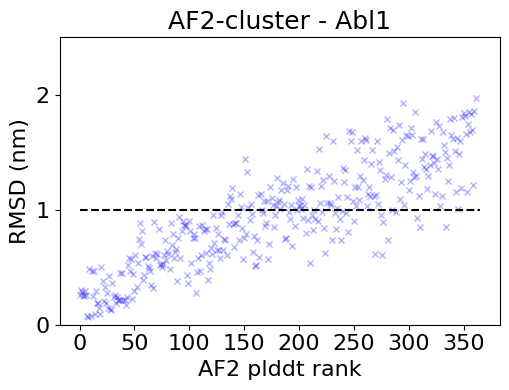

In [ ]:
df_ranked = pd.read_csv(f'{folder}/AF2rank.csv')
rmsd_cutoff = 1
fig=plt.figure(figsize=(5.2,4))
plt.plot(df_ranked['RMSD (nm)'], 'bx', alpha=0.3, markersize=5)
plt.hlines(rmsd_cutoff, 0, 365, 'k', linestyles='dashed')
plt.xlabel('AF2 plddt rank', fontsize=16)
plt.ylabel('RMSD (nm)', fontsize=16)
plt.ylim(0,2.5)
plt.xticks(fontsize=16)
plt.yticks([0,1,2], fontsize=16)
plt.title(f"AF2-cluster - Abl1", fontsize=18)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/AF2RAVE-Glide/Abl1_cAF2_RMSD_rank.png",dpi=300)

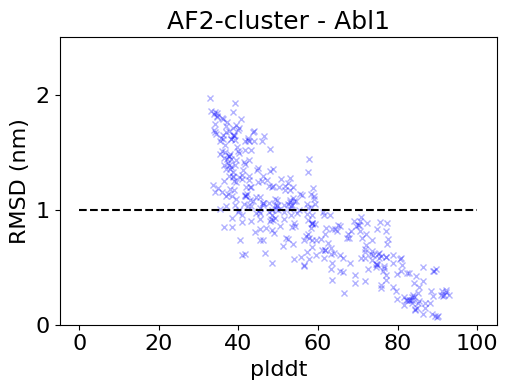

In [ ]:
fig=plt.figure(figsize=(5.2,4))
plt.plot(df_ranked['plddt'], df_ranked['RMSD (nm)'], 'bx', alpha=0.3, markersize=5)
plt.hlines(rmsd_cutoff, 0, 100, 'k', linestyles='dashed')
plt.xlabel('plddt', fontsize=16)
plt.ylabel('RMSD (nm)', fontsize=16)
plt.ylim(0,2.5)
plt.xticks(fontsize=16)
plt.yticks([0,1,2], fontsize=16)
plt.title(f"AF2-cluster - Abl1", fontsize=18)
plt.tight_layout()

In [ ]:
# inputline1 =" ".join([f"output/{df_ranked.iloc[i]['ID']}.pdb" for i in range(len(df_ranked)) if df_ranked.iloc[i]['RMSD (nm)'] < rmsd_cutoff])
# os.system(f"mdconvert {inputline1} -o Abl1_cAF2.xtc")
traj = md.load(f"{folder}/Abl1_cAF2.xtc", top=f'{folder}/output/EX_000.pdb')
cv = kcv.kinase_cvs("Abl1",traj.top,resids_Abl1,traj)
CVs = []
for i in range(len(cv.allcvs)):
    CVs.append(cv.allcvs[i].traj)
CVs = np.transpose(CVs)
t_af2=kcv.getdunbrack12(CVs)
sb = kcv.SB_CB_chodera(resids_Abl1,traj.top,traj).traj
tls_array = np.dot(CVs[:, op_id], wts.T)

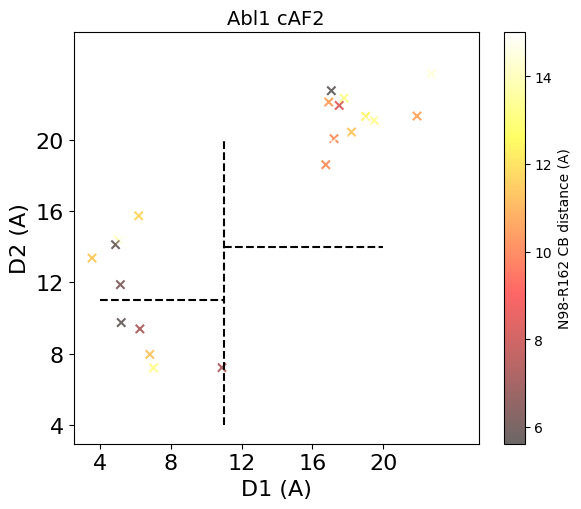

In [ ]:
fig=plt.figure(figsize=(6,5.2))
plt.scatter(t_af2[0]*10,t_af2[1]*10, marker='x', alpha=0.6, c=10*sb, cmap='hot',vmax=15),
plt.colorbar(label="N98-R162 CB distance (A)")
plt.vlines(11, 4, 20, linestyles='dashed', color='k')
plt.hlines(11, 4, 11, linestyles='dashed', color='k')
plt.hlines(14, 11, 20, linestyles='dashed', color='k')

# plt.xlim(2,22)
# plt.ylim(2,22)
plt.xlabel('D1 (A)', fontsize=16)
plt.ylabel('D2 (A)', fontsize=16)
plt.xticks(np.arange(4,24,4), fontsize=16)
plt.yticks(np.arange(4,24,4), fontsize=16)
plt.title(f"Abl1 cAF2", fontsize=14)
# plt.legend(fontsize=12)
plt.tight_layout()
#plt.savefig("Abl1_cAF2.png",dpi=300)

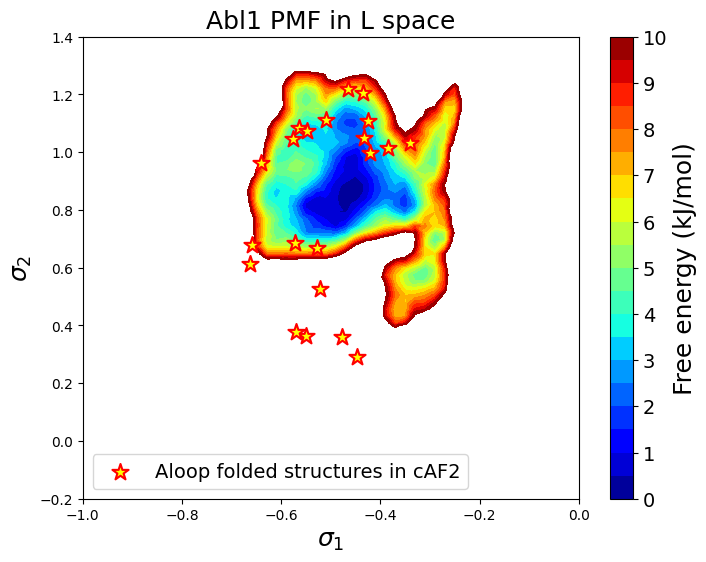

In [ ]:
plt.figure(figsize=(8, 6))

a=pd.read_csv(f'/content/drive/MyDrive/AF2RAVE-Glide/tAF2_Abl1/unbiased_MD/pmf.csv', header=0, comment='#')

b=a[a.pmf<9999]
levels=np.arange(0, 10.5, 0.5)
ax = plt.gca()
minp=np.min(b.pmf)
CS = ax.tricontourf(b.xx, b.yy, b.pmf-minp, levels, cmap=plt.get_cmap('jet'))

plot=plt.scatter(tls_array.T[0][np.where(sb<1.5)[0]],tls_array.T[1][np.where(sb<1.5)[0]],marker='*',linewidths=1.5,c='yellow',edgecolors='r',s=150,label='Aloop folded structures in cAF2')

plt.title('Abl1 PMF in L space',y=1.0,fontsize=18)
plt.xlabel("$\sigma_1$",fontsize=18)
plt.ylabel("$\sigma_2$",fontsize=18)
plt.xlim([-1,0])
plt.ylim([-0.2,1.4])
cbar = plt.colorbar(CS)
cbar.set_label(label='Free energy (kJ/mol)',size=18)

plt.legend(fontsize=14, loc='lower left')
cbar.set_ticks(np.arange(0, 10.5, 1))
cbar.ax.tick_params(labelsize=14)
plt.savefig(f"/content/drive/MyDrive/AF2RAVE-Glide/Abl1_cAF2_pmf.png",dpi=300)

In [ ]:
traj = md.load("/content/drive/MyDrive/AF2RAVE-Glide/rAF2/Abl1/Abl1_AF2.xtc", top='/content/drive/MyDrive/AF2RAVE-Glide/rAF2/Abl1/Abl1_MSA16/pred_1.pdb')
cv = kcv.kinase_cvs("Abl1",traj.top,resids_Abl1,traj)
CVs = []
for i in range(len(cv.allcvs)):
    CVs.append(cv.allcvs[i].traj)
CVs = np.transpose(CVs)
tls_array = np.dot(CVs[:, op_id], wts.T)
sb = kcv.SB_CB_chodera(resids_Abl1,traj.top,traj).traj

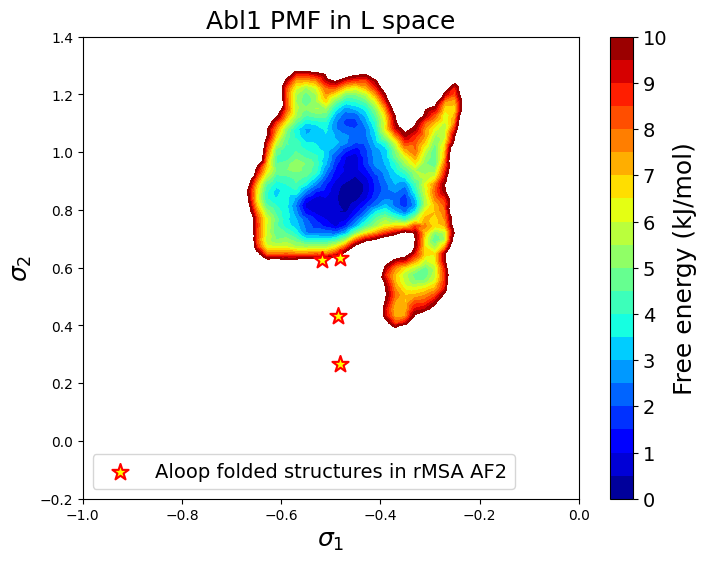

In [ ]:
plt.figure(figsize=(8, 6))

a=pd.read_csv(f'/content/drive/MyDrive/AF2RAVE-Glide/tAF2_Abl1/unbiased_MD/pmf.csv', header=0, comment='#')

b=a[a.pmf<9999]
levels=np.arange(0, 10.5, 0.5)
ax = plt.gca()
minp=np.min(b.pmf)
CS = ax.tricontourf(b.xx, b.yy, b.pmf-minp, levels, cmap=plt.get_cmap('jet'))

plot=plt.scatter(tls_array.T[0][np.where(sb<1.5)[0]],tls_array.T[1][np.where(sb<1.5)[0]],marker='*',linewidths=1.5,c='yellow',edgecolors='r',s=150,label='Aloop folded structures in rMSA AF2')

plt.title('Abl1 PMF in L space',y=1.0,fontsize=18)
plt.xlabel("$\sigma_1$",fontsize=18)
plt.ylabel("$\sigma_2$",fontsize=18)
plt.xlim([-1,0])
plt.ylim([-0.2,1.4])
cbar = plt.colorbar(CS)
cbar.set_label(label='Free energy (kJ/mol)',size=18)

plt.legend(fontsize=14, loc='lower left')
cbar.set_ticks(np.arange(0, 10.5, 1))
cbar.ax.tick_params(labelsize=14)
plt.savefig(f"/content/drive/MyDrive/AF2RAVE-Glide/Abl1_rAF2_pmf.png",dpi=300)

In [ ]:
file_list = glob.glob('/content/drive/MyDrive/AF2RAVE-Glide/tAF2_Abl1/frames/*')

ls_array = []
for file in file_list:
    traj = md.load(file)
    cv=kcv.kinase_cvs("Abl1",traj.top,resids_Abl1,traj)
    ops = []
    for j in op_id:
        ops.extend(cv.allcvs[j].traj)
    ls_array.append(np.dot(ops, wts.T))
ls_array=np.array(ls_array)

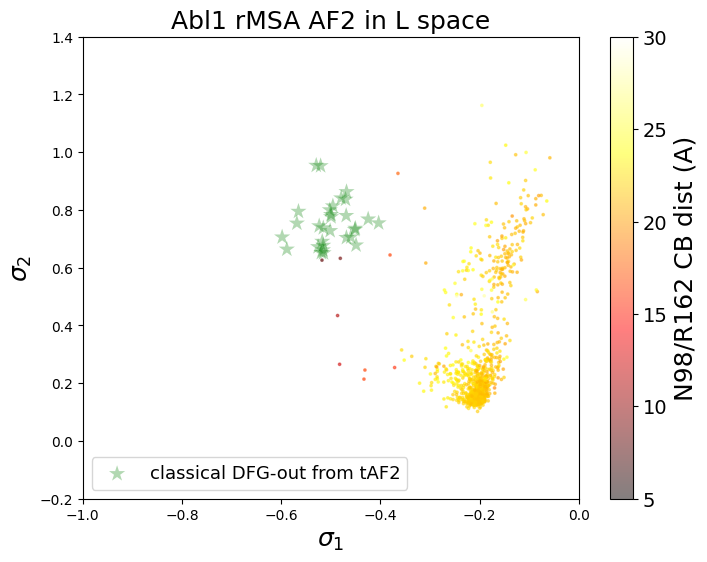

In [ ]:
traj = md.load("/content/drive/MyDrive/AF2RAVE-Glide/rAF2/Abl1/Abl1_AF2.xtc", top='/content/drive/MyDrive/AF2RAVE-Glide/rAF2/Abl1/Abl1_MSA16/pred_1.pdb')
cv = kcv.kinase_cvs("Abl1",traj.top,resids_Abl1,traj)
CVs = []
for i in range(len(cv.allcvs)):
    CVs.append(cv.allcvs[i].traj)
CVs = np.transpose(CVs)
tls_array = CVs[:, op_id]
tls_array = np.dot(tls_array, wts.T)
sb = kcv.SB_CB_chodera(resids_Abl1,traj.top,traj)

plt.figure(figsize=(8, 6))

plot=plt.scatter(tls_array.T[0],tls_array.T[1],s=3,alpha=0.5,c=sb.traj*10, cmap='hot',vmin=5, vmax=30)
plt.scatter(ls_array.T[0],ls_array.T[1],marker='*',linewidths=1.5,c='g',edgecolors='None',s=150,label='classical DFG-out from tAF2',alpha=0.3)

plt.title('Abl1 rMSA AF2 in L space',y=1.0,fontsize=18)
plt.xlabel("$\sigma_1$",fontsize=18)
plt.ylabel("$\sigma_2$",fontsize=18)
plt.xlim([-1,0])
plt.ylim([-0.2,1.4])
cbar = plt.colorbar(plot)
cbar.set_label(label='N98/R162 CB dist (A)',size=18)
cbar.ax.tick_params(labelsize=14)
plt.legend(fontsize=13, loc='lower left')
#plt.savefig("Abl1_l_rAF2.png",dpi=300)

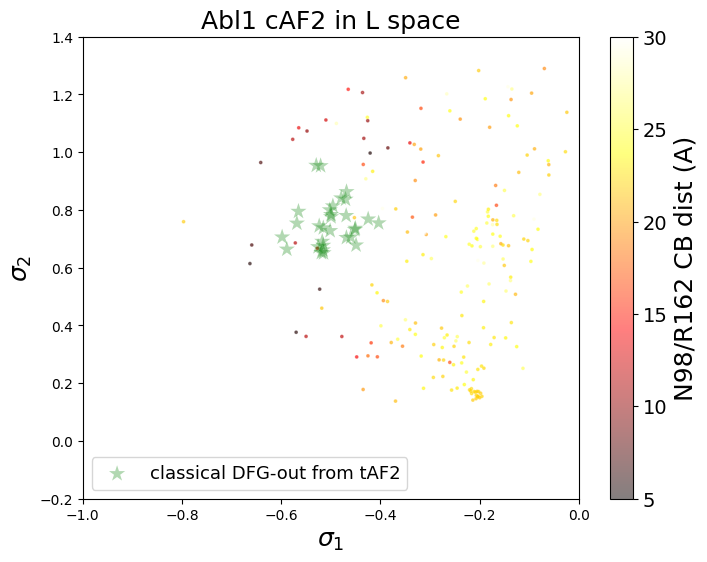

In [ ]:
traj = md.load("/content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/Abl1_cAF2.xtc", top='/content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_Abl1/output/EX_000.pdb')
cv = kcv.kinase_cvs("Abl1",traj.top,resids_Abl1,traj)
CVs = []
for i in range(len(cv.allcvs)):
    CVs.append(cv.allcvs[i].traj)
CVs = np.transpose(CVs)
tls_array = CVs[:, op_id]
tls_array = np.dot(tls_array, wts.T)
sb = kcv.SB_CB_chodera(resids_Abl1,traj.top,traj)

plt.figure(figsize=(8, 6))

plot=plt.scatter(tls_array.T[0],tls_array.T[1],s=3,alpha=0.5,c=sb.traj*10, cmap='hot',vmin=5, vmax=30)
plt.scatter(ls_array.T[0],ls_array.T[1],marker='*',linewidths=1.5,c='g',edgecolors='None',s=150,label='classical DFG-out from tAF2',alpha=0.3)

plt.title('Abl1 cAF2 in L space',y=1.0,fontsize=18)
plt.xlabel("$\sigma_1$",fontsize=18)
plt.ylabel("$\sigma_2$",fontsize=18)
plt.xlim([-1,0])
plt.ylim([-0.2,1.4])
cbar = plt.colorbar(plot)
cbar.set_label(label='N98/R162 CB dist (A)',size=18)
cbar.ax.tick_params(labelsize=14)
plt.legend(fontsize=13, loc='lower left')
#plt.savefig("Abl1_l_cAF2.png",dpi=300)

**RMSD filter for AF2-cluster ensemble of DDR1**

In [ ]:
folder = '/content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1'
temp = f'/content/drive/MyDrive/AF2RAVE-Glide/rAF2/DDR1/DDR1_MSA16/pred_1.pdb'
df_rmsd = pd.DataFrame()
cids = []
rmsd_row = []
structure1 = md.load(temp)
id1 = structure1.top.select('name CA')

af2c = glob.glob(f'{folder}/output/*')
for jj in af2c:
    print(f"Processing {jj} ...")
    structure2 = md.load(jj)
    id2 = structure2.top.select('name CA')
    superposed_structure2 = structure2.superpose(structure1, atom_indices=id2, ref_atom_indices=id1)
    # Calculate the RMSD in the unit of nm
    rmsd = md.rmsd(superposed_structure2, structure1, atom_indices=id2, ref_atom_indices=id1)
    rmsd_row.append(rmsd[0])
    cid = re.findall(r'output/(.*)\.pdb', jj)[0]
    cids.append(cid)
df_rmsd['ID'] = cids
df_rmsd['RMSD (nm)'] = rmsd_row

Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/output/EX_229.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/output/EX_068.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/output/EX_074.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/output/EX_161.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/output/EX_206.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/output/EX_080.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/output/EX_163.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/output/EX_142.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/output/EX_075.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/output/EX_U10-009.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/output

In [ ]:
slurms = glob.glob(f'{folder}/slurm_log/*')
for slurm in slurms:
    print(f"Processing {slurm} ...")
    with open(slurm, 'r') as file:
        jj = file.read()
        if len(re.findall(r'plddt: (.*)', jj)) != 0:
            cid = re.findall(r'subsampled_MSAs/(.*)\.a3m', jj)[0]
            plddt = float(re.findall(r'plddt: (.*)', jj)[0])
            df_rmsd.loc[df_rmsd['ID']==cid, 'plddt'] = plddt

Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/slurm_log/slurm-4896527.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/slurm_log/slurm-4896445.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/slurm_log/slurm-4896462.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/slurm_log/slurm-4896498.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/slurm_log/slurm-4896560.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/slurm_log/slurm-4896638.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/slurm_log/slurm-4896622.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/slurm_log/slurm-4896420.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/slurm_log/slurm-4896408.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/slurm_log/sl

In [ ]:
df_ranked = df_rmsd.sort_values(by='plddt',ascending=False,ignore_index=True)
df_ranked.to_csv(f'{folder}/AF2rank.csv',index=False)
df_ranked

,ID,RMSD (nm),plddt
0,EX_U100-007,0.508456,91.232
1,EX_U100-001,0.513293,90.670
2,EX_U100-006,0.501940,90.639
3,EX_U100-002,0.511762,90.249
4,EX_U100-000,0.509419,90.082
...,...,...,...
246,EX_138,1.719174,34.322
247,EX_022,1.788426,34.129
248,EX_108,1.750302,33.734
249,EX_200,2.064363,33.687


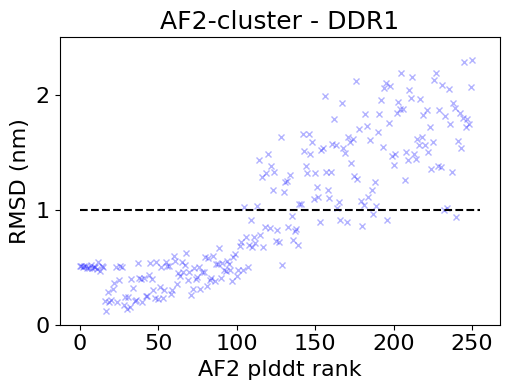

In [ ]:
df_ranked = pd.read_csv(f'{folder}/AF2rank.csv')
rmsd_cutoff = 1
fig=plt.figure(figsize=(5.2,4))
plt.plot(df_ranked['RMSD (nm)'], 'bx', alpha=0.3, markersize=5)
plt.hlines(rmsd_cutoff, 0, 255, 'k', linestyles='dashed')
plt.xlabel('AF2 plddt rank', fontsize=16)
plt.ylabel('RMSD (nm)', fontsize=16)
plt.ylim(0,2.5)
plt.xticks(fontsize=16)
plt.yticks([0,1,2], fontsize=16)
plt.title(f"AF2-cluster - DDR1", fontsize=18)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/AF2RAVE-Glide/DDR1_cAF2_RMSD_rank.png",dpi=300)

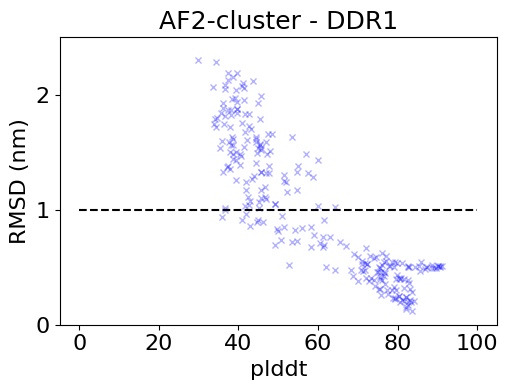

In [ ]:
fig=plt.figure(figsize=(5.2,4))
plt.plot(df_ranked['plddt'], df_ranked['RMSD (nm)'], 'bx', alpha=0.3, markersize=5)
plt.hlines(rmsd_cutoff, 0, 100, 'k', linestyles='dashed')
plt.xlabel('plddt', fontsize=16)
plt.ylabel('RMSD (nm)', fontsize=16)
plt.ylim(0,2.5)
plt.xticks(fontsize=16)
plt.yticks([0,1,2], fontsize=16)
plt.title(f"AF2-cluster - DDR1", fontsize=18)
plt.tight_layout()

In [ ]:
# inputline1 =" ".join([f"output/{df_ranked.iloc[i]['ID']}.pdb" for i in range(len(df_ranked)) if df_ranked.iloc[i]['RMSD (nm)'] < rmsd_cutoff])
# os.system(f"mdconvert {inputline1} -o DDR1_cAF2.xtc")
traj = md.load(f"{folder}/DDR1_cAF2.xtc", top=f'{folder}/output/EX_000.pdb')
cv = kcv.kinase_cvs("DDR1",traj.top,resids_DDR1,traj)
CVs = []
for i in range(len(cv.allcvs)):
    CVs.append(cv.allcvs[i].traj)
CVs = np.transpose(CVs)
t_af2=kcv.getdunbrack12(CVs)
sb = kcv.SB_chodera(resids_DDR1,traj.top,traj).traj
tls_array = np.dot(CVs[:, op_id], wts.T)

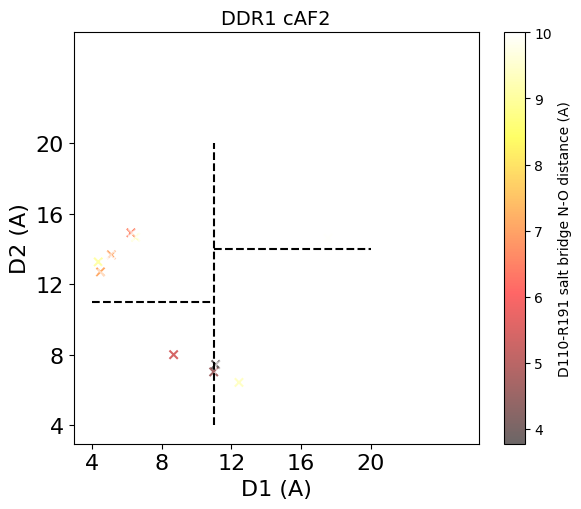

In [ ]:
fig=plt.figure(figsize=(6,5.2))
plt.scatter(t_af2[0]*10,t_af2[1]*10, marker='x', alpha=0.6, c=10*sb, cmap='hot',vmax=10),
plt.colorbar(label="D110-R191 salt bridge N-O distance (A)")
plt.vlines(11, 4, 20, linestyles='dashed', color='k')
plt.hlines(11, 4, 11, linestyles='dashed', color='k')
plt.hlines(14, 11, 20, linestyles='dashed', color='k')

# plt.xlim(2,22)
# plt.ylim(2,22)
plt.xlabel('D1 (A)', fontsize=16)
plt.ylabel('D2 (A)', fontsize=16)
plt.xticks(np.arange(4,24,4), fontsize=16)
plt.yticks(np.arange(4,24,4), fontsize=16)
plt.title(f"DDR1 cAF2", fontsize=14)
# plt.legend(fontsize=12)
plt.tight_layout()
#plt.savefig("DDR1_cAF2.png",dpi=300)

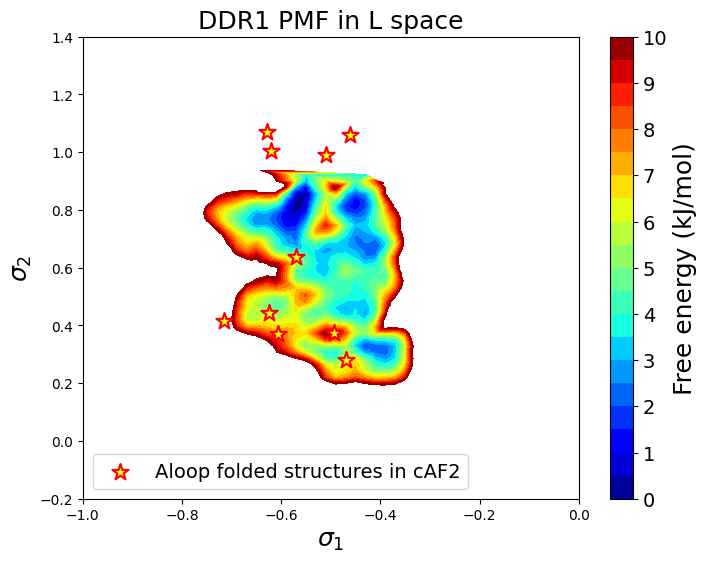

In [ ]:
plt.figure(figsize=(8, 6))


a=pd.read_csv('/content/drive/MyDrive/AF2RAVE-Glide/US_DDR1/wham1/PMF.txt', header=None, delim_whitespace=True, comment='#')

a.columns = ['xx', 'yy', 'pmf','prob']
b=a[a.pmf<9999]
levels=np.arange(0, 10.5, 0.5)
ax = plt.gca()
minp=np.min(b.pmf)
CS = ax.tricontourf(b.xx, b.yy, b.pmf-minp, levels, cmap=plt.get_cmap('jet'))


plot=plt.scatter(tls_array.T[0][np.where(sb<1)[0]],tls_array.T[1][np.where(sb<1)[0]],marker='*',linewidths=1.5,c='yellow',edgecolors='r',s=150,label='Aloop folded structures in cAF2')

plt.title('DDR1 PMF in L space',y=1.0,fontsize=18)
plt.xlabel("$\sigma_1$",fontsize=18)
plt.ylabel("$\sigma_2$",fontsize=18)
plt.xlim([-1,0])
plt.ylim([-0.2,1.4])
cbar = plt.colorbar(CS)
cbar.set_label(label='Free energy (kJ/mol)',size=18)

plt.legend(fontsize=14, loc='lower left')
cbar.set_ticks(np.arange(0, 10.5, 1))
cbar.ax.tick_params(labelsize=14)
plt.savefig(f"/content/drive/MyDrive/AF2RAVE-Glide/DDR1_cAF2_pmf.png",dpi=300)

In [ ]:
traj = md.load("/content/drive/MyDrive/AF2RAVE-Glide/rAF2/DDR1/DDR1_AF2.xtc", top='/content/drive/MyDrive/AF2RAVE-Glide/rAF2/DDR1/DDR1_MSA16/pred_1.pdb')
cv = kcv.kinase_cvs("DDR1",traj.top,resids_DDR1,traj)
CVs = []
for i in range(len(cv.allcvs)):
    CVs.append(cv.allcvs[i].traj)
CVs = np.transpose(CVs)
tls_array = np.dot(CVs[:, op_id], wts.T)
sb = kcv.SB_chodera(resids_DDR1,traj.top,traj).traj

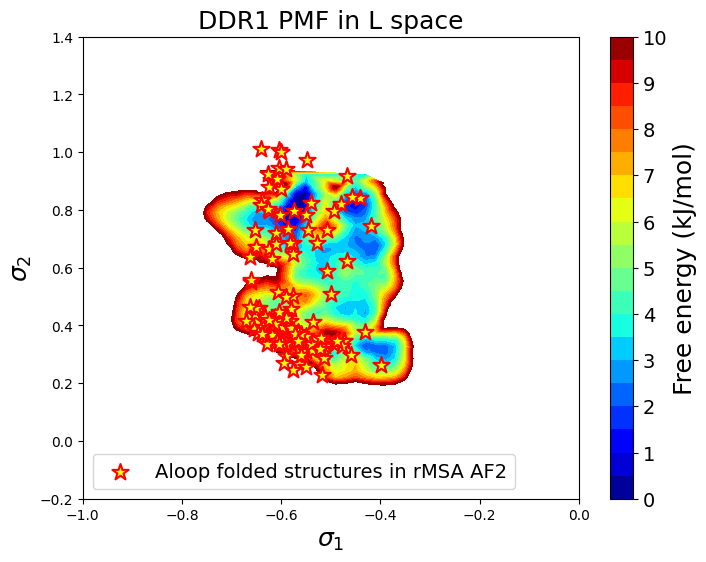

In [ ]:
plt.figure(figsize=(8, 6))

a=pd.read_csv('/content/drive/MyDrive/AF2RAVE-Glide/US_DDR1/wham1/PMF.txt', header=None, delim_whitespace=True, comment='#')

a.columns = ['xx', 'yy', 'pmf','prob']
b=a[a.pmf<9999]
levels=np.arange(0, 10.5, 0.5)
ax = plt.gca()
minp=np.min(b.pmf)
CS = ax.tricontourf(b.xx, b.yy, b.pmf-minp, levels, cmap=plt.get_cmap('jet'))


plot=plt.scatter(tls_array.T[0][np.where(sb<1)[0]],tls_array.T[1][np.where(sb<1)[0]],marker='*',linewidths=1.5,c='yellow',edgecolors='r',s=150,label='Aloop folded structures in rMSA AF2')

plt.title('DDR1 PMF in L space',y=1.0,fontsize=18)
plt.xlabel("$\sigma_1$",fontsize=18)
plt.ylabel("$\sigma_2$",fontsize=18)
plt.xlim([-1,0])
plt.ylim([-0.2,1.4])
cbar = plt.colorbar(CS)
cbar.set_label(label='Free energy (kJ/mol)',size=18)

plt.legend(fontsize=14, loc='lower left')
cbar.set_ticks(np.arange(0, 10.5, 1))
cbar.ax.tick_params(labelsize=14)
plt.savefig(f"/content/drive/MyDrive/AF2RAVE-Glide/DDR1_rAF2_pmf.png",dpi=300)

In [ ]:
file_list = glob.glob('/content/drive/MyDrive/AF2RAVE-Glide/IFD_valid/DDR1/frames/*')

ls_array = []
for file in file_list:
    traj = md.load(file)
    cv=kcv.kinase_cvs("DDR1",traj.top,resids_DDR1,traj)
    ops = []
    for j in op_id:
        ops.extend(cv.allcvs[j].traj)
    ls_array.append(np.dot(ops, wts.T))
ls_array=np.array(ls_array)

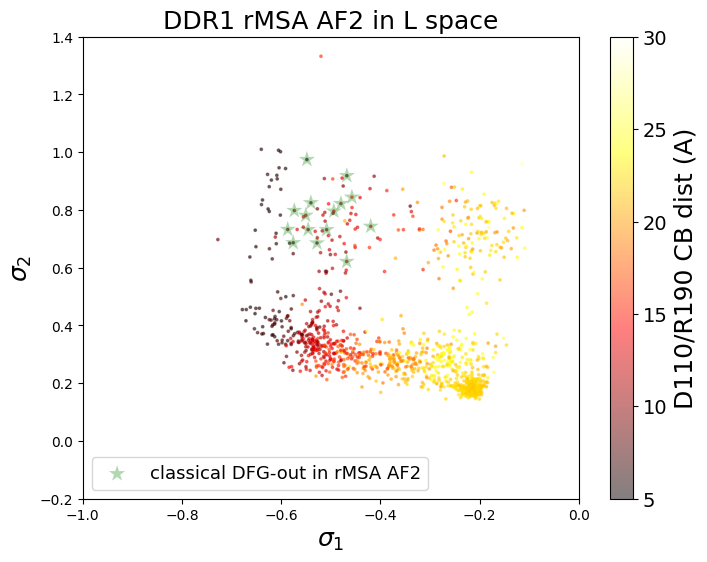

In [ ]:
traj = md.load("/content/drive/MyDrive/AF2RAVE-Glide/rAF2/DDR1/DDR1_AF2.xtc", top='/content/drive/MyDrive/AF2RAVE-Glide/rAF2/DDR1/DDR1_MSA16/pred_1.pdb')
cv = kcv.kinase_cvs("DDR1",traj.top,resids_DDR1,traj)
CVs = []
for i in range(len(cv.allcvs)):
    CVs.append(cv.allcvs[i].traj)
CVs = np.transpose(CVs)
tls_array = CVs[:, op_id]
tls_array = np.dot(tls_array, wts.T)
sb = kcv.SB_CB_chodera(resids_DDR1,traj.top,traj)

plt.figure(figsize=(8, 6))

plot=plt.scatter(tls_array.T[0],tls_array.T[1],s=3,alpha=0.5,c=sb.traj*10, cmap='hot',vmin=5, vmax=30)
plt.scatter(ls_array.T[0],ls_array.T[1],marker='*',linewidths=1.5,c='g',edgecolors='None',s=150,label='classical DFG-out in rMSA AF2',alpha=0.3)

plt.title('DDR1 rMSA AF2 in L space',y=1.0,fontsize=18)
plt.xlabel("$\sigma_1$",fontsize=18)
plt.ylabel("$\sigma_2$",fontsize=18)
plt.xlim([-1,0])
plt.ylim([-0.2,1.4])
cbar = plt.colorbar(plot)
cbar.set_label(label='D110/R190 CB dist (A)',size=18)
cbar.ax.tick_params(labelsize=14)
plt.legend(fontsize=13, loc='lower left')
#plt.savefig("DDR1_l_rAF2.png",dpi=300)

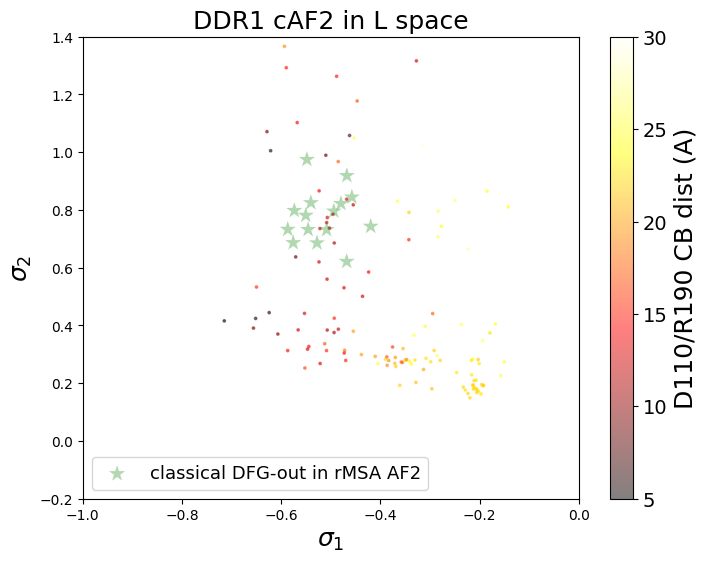

In [ ]:
traj = md.load("/content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/DDR1_cAF2.xtc", top='/content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_DDR1/output/EX_000.pdb')
cv = kcv.kinase_cvs("DDR1",traj.top,resids_DDR1,traj)
CVs = []
for i in range(len(cv.allcvs)):
    CVs.append(cv.allcvs[i].traj)
CVs = np.transpose(CVs)
tls_array = CVs[:, op_id]
tls_array = np.dot(tls_array, wts.T)
sb = kcv.SB_CB_chodera(resids_DDR1,traj.top,traj)

plt.figure(figsize=(8, 6))

plot=plt.scatter(tls_array.T[0],tls_array.T[1],s=3,alpha=0.5,c=sb.traj*10, cmap='hot',vmin=5, vmax=30)
plt.scatter(ls_array.T[0],ls_array.T[1],marker='*',linewidths=1.5,c='g',edgecolors='None',s=150,label='classical DFG-out in rMSA AF2',alpha=0.3)

plt.title('DDR1 cAF2 in L space',y=1.0,fontsize=18)
plt.xlabel("$\sigma_1$",fontsize=18)
plt.ylabel("$\sigma_2$",fontsize=18)
plt.xlim([-1,0])
plt.ylim([-0.2,1.4])
cbar = plt.colorbar(plot)
cbar.set_label(label='D110/R190 CB dist (A)',size=18)
cbar.ax.tick_params(labelsize=14)
plt.legend(fontsize=13, loc='lower left')
#plt.savefig("DDR1_l_cAF2.png",dpi=300)

**RMSD filter for AF2-cluster ensemble of srcK**


In [ ]:
folder = '/content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK'
temp = f'/content/drive/MyDrive/AF2RAVE-Glide/rAF2/srcK/src_16MSA_0/pred_1.pdb'
df_rmsd = pd.DataFrame()
cids = []
rmsd_row = []
structure1 = md.load(temp)
id1 = structure1.top.select('name CA')

af2c = glob.glob(f'{folder}/output/*')
for jj in af2c:
    print(f"Processing {jj} ...")
    structure2 = md.load(jj)
    id2 = structure2.top.select('name CA')[:len(id1)]
    superposed_structure2 = structure2.superpose(structure1, atom_indices=id2, ref_atom_indices=id1)
    # Calculate the RMSD in the unit of nm
    rmsd = md.rmsd(superposed_structure2, structure1, atom_indices=id2, ref_atom_indices=id1)
    rmsd_row.append(rmsd[0])
    cid = re.findall(r'output/(.*)\.pdb', jj)[0]
    cids.append(cid)
df_rmsd['ID'] = cids
df_rmsd['RMSD (nm)'] = rmsd_row

Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/output/EX_186.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/output/EX_238.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/output/EX_144.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/output/EX_267.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/output/EX_225.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/output/EX_141.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/output/EX_226.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/output/EX_138.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/output/EX_262.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/output/EX_037.pdb ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/output/EX_

In [ ]:
slurms = glob.glob(f'{folder}/slurm_log/*')
for slurm in slurms:
    print(f"Processing {slurm} ...")
    with open(slurm, 'r') as file:
        jj = file.read()
        if len(re.findall(r'plddt: (.*)', jj)) != 0:
            cid = re.findall(r'subsampled_MSAs/(.*)\.a3m', jj)[0]
            plddt = float(re.findall(r'plddt: (.*)', jj)[0])
            df_rmsd.loc[df_rmsd['ID']==cid, 'plddt'] = plddt

Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/slurm_log/slurm-5726229.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/slurm_log/slurm-5726108.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/slurm_log/slurm-5726269.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/slurm_log/slurm-5725988.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/slurm_log/slurm-5726216.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/slurm_log/slurm-5726166.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/slurm_log/slurm-5725994.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/slurm_log/slurm-5726159.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/slurm_log/slurm-5725938.out ...
Processing /content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/slurm_log/sl

In [ ]:
df_ranked = df_rmsd.sort_values(by='plddt',ascending=False,ignore_index=True)
df_ranked.to_csv(f'{folder}/AF2rank.csv',index=False)
df_ranked

,ID,RMSD (nm),plddt
0,EX_U10-004,0.033263,93.129
1,EX_U10-006,0.037740,93.111
2,EX_U10-008,0.046802,92.062
3,EX_U10-002,0.036757,91.882
4,EX_U10-009,0.037604,91.867
...,...,...,...
350,EX_309,2.045269,32.207
351,EX_132,1.846906,31.970
352,EX_186,1.685145,31.230
353,EX_273,2.138428,31.114


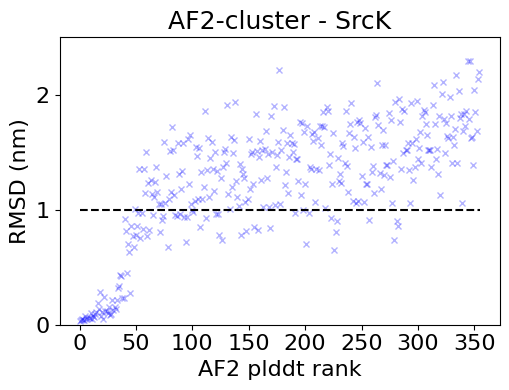

In [ ]:
df_ranked = pd.read_csv(f'{folder}/AF2rank.csv')
rmsd_cutoff = 1
fig=plt.figure(figsize=(5.2,4))
plt.plot(df_ranked['RMSD (nm)'], 'bx', alpha=0.3, markersize=5)
plt.hlines(rmsd_cutoff, 0, 355, 'k', linestyles='dashed')
plt.xlabel('AF2 plddt rank', fontsize=16)
plt.ylabel('RMSD (nm)', fontsize=16)
plt.ylim(0,2.5)
plt.xticks(fontsize=16)
plt.yticks([0,1,2], fontsize=16)
plt.title(f"AF2-cluster - SrcK", fontsize=18)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/AF2RAVE-Glide/SrcK_cAF2_RMSD_rank.png",dpi=300)

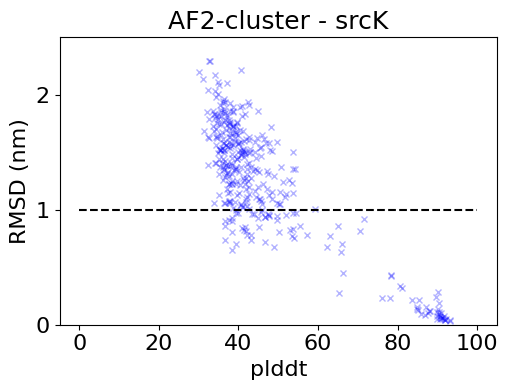

In [ ]:
fig=plt.figure(figsize=(5.2,4))
plt.plot(df_ranked['plddt'], df_ranked['RMSD (nm)'], 'bx', alpha=0.3, markersize=5)
plt.hlines(rmsd_cutoff, 0, 100, 'k', linestyles='dashed')
plt.xlabel('plddt', fontsize=16)
plt.ylabel('RMSD (nm)', fontsize=16)
plt.ylim(0,2.5)
plt.xticks(fontsize=16)
plt.yticks([0,1,2], fontsize=16)
plt.title(f"AF2-cluster - srcK", fontsize=18)
plt.tight_layout()

In [ ]:
inputline1 =" ".join([f"{folder}/output/{df_ranked.iloc[i]['ID']}.pdb" for i in range(len(df_ranked)) if df_ranked.iloc[i]['RMSD (nm)'] < rmsd_cutoff])
os.system(f"mdconvert {inputline1} -o {folder}/srcK_cAF2.xtc")
traj = md.load(f"{folder}/srcK_cAF2.xtc", top=f'{folder}/output/EX_000.pdb')
cv = kcv.kinase_cvs("srcK",traj.top,resids_srcK,traj)
CVs = []
for i in range(len(cv.allcvs)):
    CVs.append(cv.allcvs[i].traj)
CVs = np.transpose(CVs)
t_af2=kcv.getdunbrack12(CVs)
sb = kcv.SB_CB_chodera(resids_srcK,traj.top,traj).traj
tls_array = np.dot(CVs[:, op_id], wts.T)

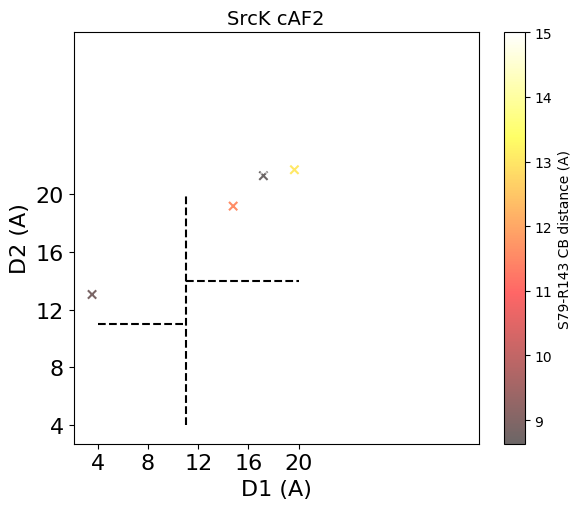

In [ ]:
fig=plt.figure(figsize=(6,5.2))
plt.scatter(t_af2[0]*10,t_af2[1]*10, marker='x', alpha=0.6, c=10*sb, cmap='hot',vmax=15),
plt.colorbar(label="S79-R143 CB dist (A)")
plt.vlines(11, 4, 20, linestyles='dashed', color='k')
plt.hlines(11, 4, 11, linestyles='dashed', color='k')
plt.hlines(14, 11, 20, linestyles='dashed', color='k')

# plt.xlim(2,22)
# plt.ylim(2,22)
plt.xlabel('D1 (A)', fontsize=16)
plt.ylabel('D2 (A)', fontsize=16)
plt.xticks(np.arange(4,24,4), fontsize=16)
plt.yticks(np.arange(4,24,4), fontsize=16)
plt.title(f"SrcK cAF2", fontsize=14)
# plt.legend(fontsize=12)
plt.tight_layout()
#plt.savefig("DDR1_cAF2.png",dpi=300)

In [44]:
file_list = glob.glob('/content/drive/MyDrive/AF2RAVE-Glide/tAF2_srcK/srcK_tAF*.pdb')

ls_array = []
for file in file_list:
    traj = md.load(file)
    cv=kcv.kinase_cvs("srcK",traj.top,resids_srcK,traj)
    ops = []
    for j in op_id:
        ops.extend(cv.allcvs[j].traj)
    ls_array.append(np.dot(ops, wts.T))
ls_array=np.array(ls_array)

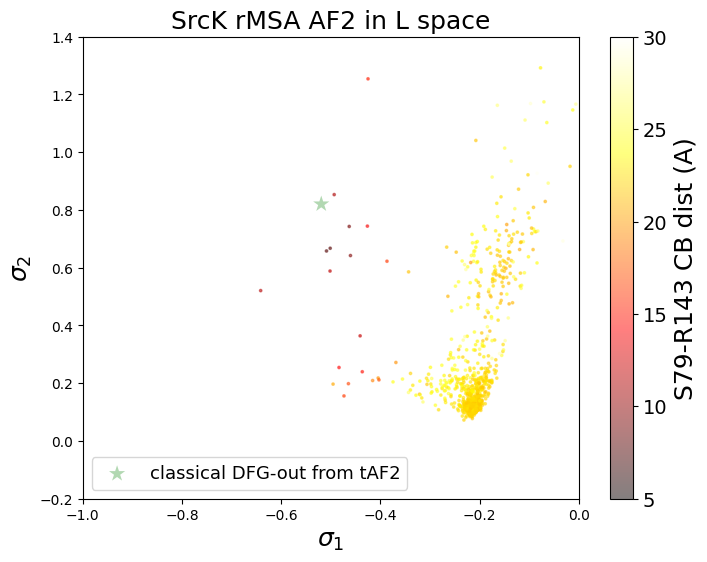

In [48]:
traj = md.load("/content/drive/MyDrive/AF2RAVE-Glide/rAF2/srcK/srcK_AF2.xtc", top='/content/drive/MyDrive/AF2RAVE-Glide/rAF2/srcK/src_16MSA_0/pred_1.pdb')
cv = kcv.kinase_cvs("srcK",traj.top,resids_srcK,traj)
CVs = []
for i in range(len(cv.allcvs)):
    CVs.append(cv.allcvs[i].traj)
CVs = np.transpose(CVs)
tls_array = CVs[:, op_id]
tls_array = np.dot(tls_array, wts.T)
sb = kcv.SB_CB_chodera(resids_srcK,traj.top,traj)

plt.figure(figsize=(8, 6))

plot=plt.scatter(tls_array.T[0],tls_array.T[1],s=3,alpha=0.5,c=sb.traj*10, cmap='hot',vmin=5, vmax=30)
plt.scatter(ls_array.T[0],ls_array.T[1],marker='*',linewidths=1.5,c='g',edgecolors='None',s=150,label='classical DFG-out from tAF2',alpha=0.3)

plt.title('SrcK rMSA AF2 in L space',y=1.0,fontsize=18)
plt.xlabel("$\sigma_1$",fontsize=18)
plt.ylabel("$\sigma_2$",fontsize=18)
plt.xlim([-1,0])
plt.ylim([-0.2,1.4])
cbar = plt.colorbar(plot)
cbar.set_label(label='S79-R143 CB dist (A)',size=18)
cbar.ax.tick_params(labelsize=14)
plt.legend(fontsize=13, loc='lower left')
plt.savefig("/content/drive/MyDrive/AF2RAVE-Glide/SrcK_l_rAF2.png",dpi=300)

In [49]:
len(tls_array)

1190

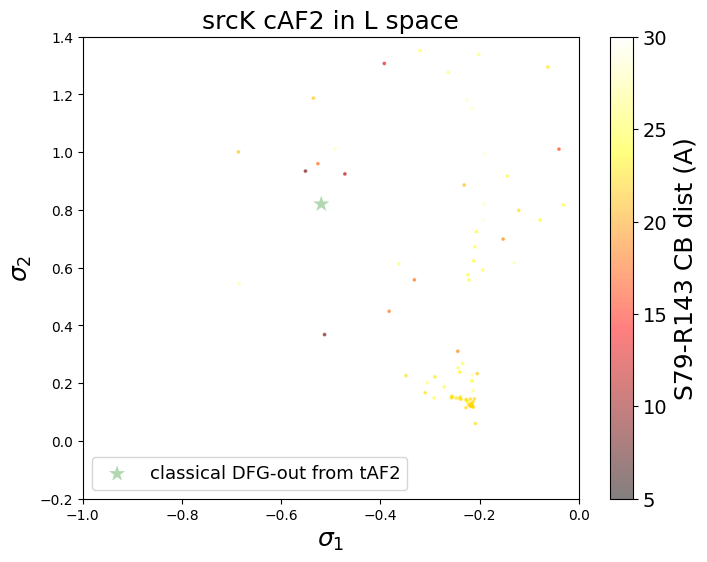

In [47]:
traj = md.load("/content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/srcK_cAF2.xtc", top='/content/drive/MyDrive/AF2RAVE-Glide/cAF2/af2_cluster_srcK/output/EX_000.pdb')
cv = kcv.kinase_cvs("srcK",traj.top,resids_srcK,traj)
CVs = []
for i in range(len(cv.allcvs)):
    CVs.append(cv.allcvs[i].traj)
CVs = np.transpose(CVs)
tls_array = CVs[:, op_id]
tls_array = np.dot(tls_array, wts.T)
sb = kcv.SB_CB_chodera(resids_srcK,traj.top,traj)

plt.figure(figsize=(8, 6))

plot=plt.scatter(tls_array.T[0],tls_array.T[1],s=3,alpha=0.5,c=sb.traj*10, cmap='hot',vmin=5, vmax=30)
plt.scatter(ls_array.T[0],ls_array.T[1],marker='*',linewidths=1.5,c='g',edgecolors='None',s=150,label='classical DFG-out from tAF2',alpha=0.3)

plt.title('srcK cAF2 in L space',y=1.0,fontsize=18)
plt.xlabel("$\sigma_1$",fontsize=18)
plt.ylabel("$\sigma_2$",fontsize=18)
plt.xlim([-1,0])
plt.ylim([-0.2,1.4])
cbar = plt.colorbar(plot)
cbar.set_label(label='S79-R143 CB dist (A)',size=18)
cbar.ax.tick_params(labelsize=14)
plt.legend(fontsize=13, loc='lower left')
plt.savefig("/content/drive/MyDrive/AF2RAVE-Glide/srcK_l_cAF2.png",dpi=300)

In [ ]:
len(tls_array)

93